In [2]:
import fastf1
import pandas as pd

In [3]:
#load event calendar for 2024 without testing
calendar = fastf1.get_event_schedule(2024, include_testing=False)
calendar.head()

req         WARNING 	DEFAULT CACHE ENABLED! (97.87 MB) C:\Users\chris\AppData\Local\Temp\fastf1


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024,2024-03-02,Bahrain Grand Prix,conventional,Practice 1,2024-02-29 14:30:00+03:00,2024-02-29 11:30:00,...,Practice 3,2024-03-01 15:30:00+03:00,2024-03-01 12:30:00,Qualifying,2024-03-01 19:00:00+03:00,2024-03-01 16:00:00,Race,2024-03-02 18:00:00+03:00,2024-03-02 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,2024-03-09,Saudi Arabian Grand Prix,conventional,Practice 1,2024-03-07 16:30:00+03:00,2024-03-07 13:30:00,...,Practice 3,2024-03-08 16:30:00+03:00,2024-03-08 13:30:00,Qualifying,2024-03-08 20:00:00+03:00,2024-03-08 17:00:00,Race,2024-03-09 20:00:00+03:00,2024-03-09 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024,2024-03-24,Australian Grand Prix,conventional,Practice 1,2024-03-22 12:30:00+11:00,2024-03-22 01:30:00,...,Practice 3,2024-03-23 12:30:00+11:00,2024-03-23 01:30:00,Qualifying,2024-03-23 16:00:00+11:00,2024-03-23 05:00:00,Race,2024-03-24 15:00:00+11:00,2024-03-24 04:00:00,True
4,4,Japan,Suzuka,FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024,2024-04-07,Japanese Grand Prix,conventional,Practice 1,2024-04-05 11:30:00+09:00,2024-04-05 02:30:00,...,Practice 3,2024-04-06 11:30:00+09:00,2024-04-06 02:30:00,Qualifying,2024-04-06 15:00:00+09:00,2024-04-06 06:00:00,Race,2024-04-07 14:00:00+09:00,2024-04-07 05:00:00,True
5,5,China,Shanghai,FORMULA 1 LENOVO CHINESE GRAND PRIX 2024,2024-04-21,Chinese Grand Prix,sprint_qualifying,Practice 1,2024-04-19 11:30:00+08:00,2024-04-19 03:30:00,...,Sprint,2024-04-20 11:00:00+08:00,2024-04-20 03:00:00,Qualifying,2024-04-20 15:00:00+08:00,2024-04-20 07:00:00,Race,2024-04-21 15:00:00+08:00,2024-04-21 07:00:00,True


In [7]:
calendar.columns

Index(['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate',
       'EventName', 'EventFormat', 'Session1', 'Session1Date',
       'Session1DateUtc', 'Session2', 'Session2Date', 'Session2DateUtc',
       'Session3', 'Session3Date', 'Session3DateUtc', 'Session4',
       'Session4Date', 'Session4DateUtc', 'Session5', 'Session5Date',
       'Session5DateUtc', 'F1ApiSupport'],
      dtype='object')

In [11]:
calendar.shape #nrows, ncols

(24, 23)

In [12]:
calendar.info()

<class 'fastf1.events.EventSchedule'>
Index: 24 entries, 1 to 24
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   RoundNumber        24 non-null     int32         
 1   Country            24 non-null     object        
 2   Location           24 non-null     object        
 3   OfficialEventName  24 non-null     object        
 4   EventDate          24 non-null     datetime64[ns]
 5   EventName          24 non-null     object        
 6   EventFormat        24 non-null     object        
 7   Session1           24 non-null     object        
 8   Session1Date       24 non-null     object        
 9   Session1DateUtc    24 non-null     datetime64[ns]
 10  Session2           24 non-null     object        
 11  Session2Date       24 non-null     object        
 12  Session2DateUtc    24 non-null     datetime64[ns]
 13  Session3           24 non-null     object        
 14  Session3Date     

In [14]:
#list all events
calendar['EventName']

1            Bahrain Grand Prix
2      Saudi Arabian Grand Prix
3         Australian Grand Prix
4           Japanese Grand Prix
5            Chinese Grand Prix
6              Miami Grand Prix
7     Emilia Romagna Grand Prix
8             Monaco Grand Prix
9           Canadian Grand Prix
10           Spanish Grand Prix
11          Austrian Grand Prix
12           British Grand Prix
13         Hungarian Grand Prix
14           Belgian Grand Prix
15             Dutch Grand Prix
16           Italian Grand Prix
17        Azerbaijan Grand Prix
18         Singapore Grand Prix
19     United States Grand Prix
20       Mexico City Grand Prix
21         São Paulo Grand Prix
22         Las Vegas Grand Prix
23             Qatar Grand Prix
24         Abu Dhabi Grand Prix
Name: EventName, dtype: object

In [4]:
#create custom event name for usage in streamlit input fields
calendar['CustomEventName'] = "Race " + calendar['RoundNumber'].astype(str) + " - " + calendar['EventName'] + " - " + calendar['Location']
print(calendar['CustomEventName'])

1                 Race 1 - Bahrain Grand Prix - Sakhir
2           Race 2 - Saudi Arabian Grand Prix - Jeddah
3           Race 3 - Australian Grand Prix - Melbourne
4                Race 4 - Japanese Grand Prix - Suzuka
5               Race 5 - Chinese Grand Prix - Shanghai
6                    Race 6 - Miami Grand Prix - Miami
7           Race 7 - Emilia Romagna Grand Prix - Imola
8                  Race 8 - Monaco Grand Prix - Monaco
9              Race 9 - Canadian Grand Prix - Montréal
10            Race 10 - Spanish Grand Prix - Barcelona
11           Race 11 - Austrian Grand Prix - Spielberg
12          Race 12 - British Grand Prix - Silverstone
13           Race 13 - Hungarian Grand Prix - Budapest
14    Race 14 - Belgian Grand Prix - Spa-Francorchamps
15              Race 15 - Dutch Grand Prix - Zandvoort
16                Race 16 - Italian Grand Prix - Monza
17              Race 17 - Azerbaijan Grand Prix - Baku
18         Race 18 - Singapore Grand Prix - Marina Bay
19        

In [4]:
#alternativ: doppelungen in custom event name verhindern, indem location nur angezeigt wird, wenn nicht schon im originalen Eventnamen enthalten. wird so ins projekt übernommen
import numpy as np
import re

calendar['CustomEventName'] = np.where(
    calendar.apply(lambda row: re.search(r'\b' + re.escape(row['Location']) + r'\b', row['EventName'], re.IGNORECASE), axis=1),
    "Race " + calendar['RoundNumber'].astype(str) + " - " + calendar['EventName'],
    "Race " + calendar['RoundNumber'].astype(str) + " - " + calendar['EventName'] + " - " + calendar['Location']
)

print(calendar['CustomEventName'])

1                 Race 1 - Bahrain Grand Prix - Sakhir
2           Race 2 - Saudi Arabian Grand Prix - Jeddah
3           Race 3 - Australian Grand Prix - Melbourne
4                Race 4 - Japanese Grand Prix - Suzuka
5               Race 5 - Chinese Grand Prix - Shanghai
6                            Race 6 - Miami Grand Prix
7           Race 7 - Emilia Romagna Grand Prix - Imola
8                           Race 8 - Monaco Grand Prix
9              Race 9 - Canadian Grand Prix - Montréal
10            Race 10 - Spanish Grand Prix - Barcelona
11           Race 11 - Austrian Grand Prix - Spielberg
12          Race 12 - British Grand Prix - Silverstone
13           Race 13 - Hungarian Grand Prix - Budapest
14    Race 14 - Belgian Grand Prix - Spa-Francorchamps
15              Race 15 - Dutch Grand Prix - Zandvoort
16                Race 16 - Italian Grand Prix - Monza
17              Race 17 - Azerbaijan Grand Prix - Baku
18         Race 18 - Singapore Grand Prix - Marina Bay
19        

In [6]:
#session results for example race (Silverstone 2024)
#Possible Sessions identifiers (from fastf1 Documentation):
# 'Practice 1', 'Practice 2', 'Practice 3', 'Sprint', 'Sprint Shootout', 'Sprint Qualifying', 'Qualifying', 'Race'
#short as 'FP1', 'FP2', 'FP3', 'Q', 'S', 'SS', 'SQ', 'R' 
session = fastf1.get_session(2024, 12, 'R')

In [13]:
print(session.name)
print(session.date)
print(session.event['EventName'])

Race
2024-07-07 14:00:00
British Grand Prix
                      Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0   0 days 00:00:05.091000     15.9      67.0     991.8     False       28.1   
1   0 days 00:01:05.070000     15.9      66.0     991.7     False       27.6   
2   0 days 00:02:05.094000     15.9      65.0     991.7     False       27.0   
3   0 days 00:03:05.099000     15.9      66.0     991.8     False       27.0   
4   0 days 00:04:05.097000     15.9      64.0     991.8     False       31.0   
..                     ...      ...       ...       ...       ...        ...   
142 0 days 02:22:06.127000     15.8      69.0     992.4     False       24.8   
143 0 days 02:23:06.147000     15.9      70.0     992.4     False       25.0   
144 0 days 02:24:06.167000     15.9      71.0     992.4     False       26.1   
145 0 days 02:25:06.170000     16.0      69.0     992.5     False       26.4   
146 0 days 02:26:06.176000     16.0      68.0     992.4     False       26.2

In [8]:
#important: load all data for this session
session.load() #this can take a few seconds
session.results.head()

core           INFO 	Loading data for British Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,1.0,1,2.0,NaT,NaT,NaT,0 days 01:22:27.059000,Finished,25.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,2.0,2,4.0,NaT,NaT,NaT,0 days 00:00:01.465000,Finished,18.0
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,GBR,3.0,3,3.0,NaT,NaT,NaT,0 days 00:00:07.547000,Finished,15.0
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,4.0,4,5.0,NaT,NaT,NaT,0 days 00:00:12.429000,Finished,12.0
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,5.0,5,7.0,NaT,NaT,NaT,0 days 00:00:47.318000,Finished,11.0


In [9]:
session.drivers

['44',
 '1',
 '4',
 '81',
 '55',
 '27',
 '18',
 '14',
 '23',
 '22',
 '2',
 '20',
 '3',
 '16',
 '77',
 '31',
 '11',
 '24',
 '63',
 '10']

In [11]:
session.results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [24]:
session.results.shape

(20, 21)

In [25]:
session.results.info()

<class 'fastf1.core.SessionResults'>
Index: 20 entries, 44 to 10
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   DriverNumber        20 non-null     object         
 1   BroadcastName       20 non-null     object         
 2   Abbreviation        20 non-null     object         
 3   DriverId            20 non-null     object         
 4   TeamName            20 non-null     object         
 5   TeamColor           20 non-null     object         
 6   TeamId              20 non-null     object         
 7   FirstName           20 non-null     object         
 8   LastName            20 non-null     object         
 9   FullName            20 non-null     object         
 10  HeadshotUrl         20 non-null     object         
 11  CountryCode         20 non-null     object         
 12  Position            20 non-null     float64        
 13  ClassifiedPosition  20 non-null     object

In [9]:
#create custom driver name for usage in streamlit input fields
#what we probably want to do is make a smaller version of results as "driver_info" dataframe, then join the with the laps dataframe on driver number or "Abbreviation" column
results = session.results
results['CustomDriverName'] = results['DriverNumber'] + " - " + results['FullName'] + " - " + results['TeamName']
print(results['CustomDriverName'])

44          44 - Lewis Hamilton - Mercedes
1     1 - Max Verstappen - Red Bull Racing
4               4 - Lando Norris - McLaren
81            81 - Oscar Piastri - McLaren
55             55 - Carlos Sainz - Ferrari
27     27 - Nico Hulkenberg - Haas F1 Team
18        18 - Lance Stroll - Aston Martin
14     14 - Fernando Alonso - Aston Martin
23         23 - Alexander Albon - Williams
22                  22 - Yuki Tsunoda - RB
2            2 - Logan Sargeant - Williams
20     20 - Kevin Magnussen - Haas F1 Team
3                3 - Daniel Ricciardo - RB
16          16 - Charles Leclerc - Ferrari
77      77 - Valtteri Bottas - Kick Sauber
31              31 - Esteban Ocon - Alpine
11     11 - Sergio Perez - Red Bull Racing
24          24 - Guanyu Zhou - Kick Sauber
63          63 - George Russell - Mercedes
10              10 - Pierre Gasly - Alpine
Name: CustomDriverName, dtype: object


In [6]:
#loading all laps from the session
session.laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:59:51.778000,HAM,44,0 days 00:01:36.034000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:37.703000,...,True,Mercedes,0 days 00:58:15.512000,2024-07-07 14:03:12.541,1,3.0,False,,False,False
1,0 days 01:01:23.198000,HAM,44,0 days 00:01:31.420000,2.0,1.0,NaT,NaT,0 days 00:00:29.249000,0 days 00:00:37.314000,...,True,Mercedes,0 days 00:59:51.778000,2024-07-07 14:04:48.807,1,2.0,False,,False,True
2,0 days 01:02:54.914000,HAM,44,0 days 00:01:31.716000,3.0,1.0,NaT,NaT,0 days 00:00:29.287000,0 days 00:00:37.133000,...,True,Mercedes,0 days 01:01:23.198000,2024-07-07 14:06:20.227,1,2.0,False,,False,True
3,0 days 01:04:26.902000,HAM,44,0 days 00:01:31.988000,4.0,1.0,NaT,NaT,0 days 00:00:29.554000,0 days 00:00:37.258000,...,True,Mercedes,0 days 01:02:54.914000,2024-07-07 14:07:51.943,1,2.0,False,,False,True
4,0 days 01:05:58.579000,HAM,44,0 days 00:01:31.677000,5.0,1.0,NaT,NaT,0 days 00:00:29.469000,0 days 00:00:37.231000,...,True,Mercedes,0 days 01:04:26.902000,2024-07-07 14:09:23.931,1,2.0,False,,False,True


In [27]:
session.laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [28]:
session.laps.shape

(961, 31)

In [29]:
session.laps.info()

<class 'fastf1.core.Laps'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                961 non-null    timedelta64[ns]
 1   Driver              961 non-null    object         
 2   DriverNumber        961 non-null    object         
 3   LapTime             960 non-null    timedelta64[ns]
 4   LapNumber           961 non-null    float64        
 5   Stint               961 non-null    float64        
 6   PitOutTime          46 non-null     timedelta64[ns]
 7   PitInTime           46 non-null     timedelta64[ns]
 8   Sector1Time         941 non-null    timedelta64[ns]
 9   Sector2Time         960 non-null    timedelta64[ns]
 10  Sector3Time         960 non-null    timedelta64[ns]
 11  Sector1SessionTime  941 non-null    timedelta64[ns]
 12  Sector2SessionTime  960 non-null    timedelta64[ns]
 13  Sector3SessionTime  960 non-null    timedelta6

In [12]:
#finding out more about certain variables
#Trackstatus, for example 1 as clean track, 4 as safety car. should be used in our visualizations
session.laps['TrackStatus'].value_counts()

TrackStatus
1    961
Name: count, dtype: int64

In [13]:
session.laps['Compound'].value_counts()

Compound
MEDIUM          509
INTERMEDIATE    234
SOFT            174
HARD             44
Name: count, dtype: int64

In [14]:
session.laps['PitInTime'].value_counts()
#this marker could be used to determine, in which lap a driver took a pitstop, which we could visualize in the plot

PitInTime
0 days 01:40:20.422000    1
0 days 01:41:00.845000    1
0 days 01:39:27.190000    1
0 days 01:58:47.921000    1
0 days 01:27:54.908000    1
0 days 01:42:21.352000    1
0 days 01:59:44.116000    1
0 days 01:39:45.423000    1
0 days 01:59:09.116000    1
0 days 01:28:25.181000    1
0 days 01:32:05.879000    1
0 days 02:01:56.244000    1
0 days 01:59:12.470000    1
0 days 01:28:03.182000    1
0 days 01:44:16.811000    1
0 days 02:00:02.791000    1
0 days 02:15:42.430000    1
0 days 01:17:10.690000    1
0 days 01:28:49.813000    1
0 days 01:41:42.992000    1
0 days 02:01:04.272000    1
0 days 01:40:23.995000    1
0 days 01:58:45.121000    1
0 days 01:41:03.244000    1
0 days 02:00:27.139000    1
0 days 01:41:05.089000    1
0 days 01:38:44.599000    1
0 days 01:59:18.092000    1
0 days 01:40:17.147000    1
0 days 02:00:48.120000    1
0 days 01:42:15.701000    1
0 days 01:59:32.481000    1
0 days 01:38:45.781000    1
0 days 02:01:09.712000    1
0 days 02:18:03.383000    1
0 days 01:

In [14]:
session.weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Time           147 non-null    timedelta64[ns]
 1   AirTemp        147 non-null    float64        
 2   Humidity       147 non-null    float64        
 3   Pressure       147 non-null    float64        
 4   Rainfall       147 non-null    bool           
 5   TrackTemp      147 non-null    float64        
 6   WindDirection  147 non-null    int64          
 7   WindSpeed      147 non-null    float64        
dtypes: bool(1), float64(5), int64(1), timedelta64[ns](1)
memory usage: 8.3 KB


In [5]:
#check weather data
session.weather_data.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:05.091000,15.9,67.0,991.8,False,28.1,226,2.2
1,0 days 00:01:05.070000,15.9,66.0,991.7,False,27.6,268,1.5
2,0 days 00:02:05.094000,15.9,65.0,991.7,False,27.0,291,1.4
3,0 days 00:03:05.099000,15.9,66.0,991.8,False,27.0,195,1.1
4,0 days 00:04:05.097000,15.9,64.0,991.8,False,31.0,225,1.9


In [4]:
session.weather_data['Rainfall'].value_counts()

Rainfall
False    96
True     51
Name: count, dtype: int64

In [16]:
#finding the times with rain from session weather data
weather = session.weather_data

rain_times = weather.loc[weather["Rainfall"] == True, "Time"].apply(
    lambda td: (td.components.hours, td.components.minutes)
).tolist()
rain_times

[(0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 21),
 (0, 22),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (1, 50),
 (1, 51),
 (1, 52),
 (1, 53),
 (1, 54),
 (1, 55),
 (1, 56),
 (1, 57),
 (1, 58),
 (1, 59),
 (2, 8),
 (2, 9)]

In [26]:
#then using this data to find out the laps where it was raining
dat = session.laps

def is_raining(td):
    h = td.components.hours
    m = td.components.minutes
    return (h, m) in rain_times

dat["Raining"] = dat["Time"].apply(is_raining)

#check out laps where it was raining (with this method) just for show, this will in code be code for every row (and therefore every driver individually), as not every driver will be on the same lap at the same time
rain_laps = sorted(dat[dat["Raining"]]["LapNumber"].unique())
print("Laps where it rained", rain_laps)

Laps where it rained [17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 42.0, 43.0, 44.0]


In [24]:
#alternative to find out the laps where it was "raining" (or "the track was wet") as every lap where at least one driver was on intermediate or wet tyres. but method with official weather data from above shall be used as its more accurate
dat = session.laps
rain_tires = ['INTERMEDIATE', 'WET']

#Filter rows where tire is among these
rain_laps = sorted(dat[dat['Compound'].isin(rain_tires)]['LapNumber'].unique())
print("Laps where the track was wet:", rain_laps)

#add this information into every lap in the dataframe
dat['Wet_Track'] = dat['LapNumber'].isin(rain_laps)

Laps where the track was wet: [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0]


core           INFO 	Loading data for British Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']


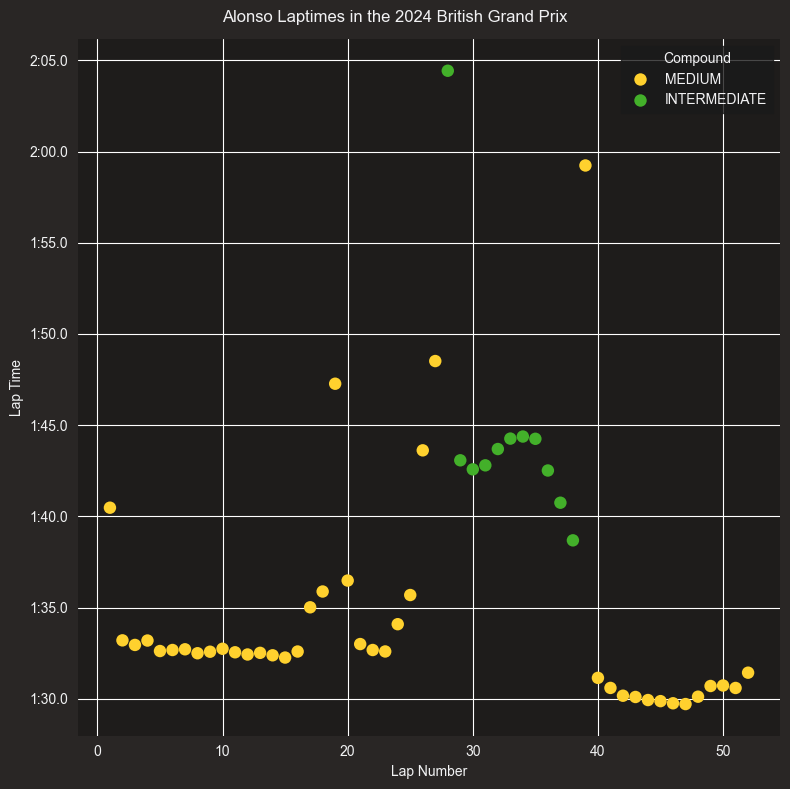

In [5]:
#building a simple output from the documentation. potentially possible to expand these and use in our project
#scatterplot driver laptimes
import seaborn as sns
from matplotlib import pyplot as plt
import fastf1.plotting

#plotting setup as given in documentation
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

race = fastf1.get_session(2024, 12, 'R')
race.load()

#driver_laps = race.laps.pick_drivers("ALO").pick_quicklaps().reset_index() #filters out slow laps like pitstops

#for exploration purposes, we will adapt the documentations example code and not filter out the slow laps
driver_laps = race.laps.pick_drivers("ALO")

#Make the scattterplot using lap number as x-axis and lap time as y-axis. Marker colors correspond to the compounds used. Note: as LapTime is represented by timedelta, calling setup_mpl earlier is required.

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')

#Make the plot more aesthetic.
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2024 British Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [ ]:
#we have seen the many warnings are generated by the fastf1 package, can if needed be suppressed with:
import warnings
warnings.filterwarnings('ignore')